In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format
import warnings
import math
import scipy.stats as stats
import scipy
from sklearn.preprocessing import scale
warnings.filterwarnings('ignore')

import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
url = 'https://raw.githubusercontent.com/cwg7/ecommerce_linear_regression/main/Ecommerce_Customers.csv'
data = pd.read_csv(url)

In [3]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.49727,12.65565,39.57767,4.08262,587.95105
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.92627,11.10946,37.26896,2.66403,392.20493
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.00091,11.33028,37.11060,4.10454,487.54750
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.30556,13.71751,36.72128,3.12018,581.85234
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.33067,12.79519,37.53665,4.44631,599.40609


In [4]:
# Removing customer address information as it is not relevant to the nature of this application
data = data.drop('Address', axis=1)
data.head()

,Email,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,Violet,34.49727,12.65565,39.57767,4.08262,587.95105
1,hduke@hotmail.com,DarkGreen,31.92627,11.10946,37.26896,2.66403,392.20493
2,pallen@yahoo.com,Bisque,33.00091,11.33028,37.11060,4.10454,487.54750
3,riverarebecca@gmail.com,SaddleBrown,34.30556,13.71751,36.72128,3.12018,581.85234
4,mstephens@davidson-herman.com,MediumAquaMarine,33.33067,12.79519,37.53665,4.44631,599.40609


In [5]:
# Removing customer email address as it is not particularly necessary either
# Avatar will be left in the dataframe purely for the purposes of maintaining a visual level of distinction/uniqueness among customer data
data = data.drop('Email', axis=1)

In [6]:
data.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.49727,12.65565,39.57767,4.08262,587.95105
1,DarkGreen,31.92627,11.10946,37.26896,2.66403,392.20493
2,Bisque,33.00091,11.33028,37.11060,4.10454,487.54750
3,SaddleBrown,34.30556,13.71751,36.72128,3.12018,581.85234
4,MediumAquaMarine,33.33067,12.79519,37.53665,4.44631,599.40609


In [7]:
# Checking for missing values
data.isnull().sum()

Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [8]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.00000,500.00000,500.00000,500.00000,500.00000
mean,33.05319,12.05249,37.06045,3.53346,499.31404
std,0.99256,0.99422,1.01049,0.99928,79.31478
min,29.53243,8.50815,33.91385,0.26990,256.67058
25%,32.34182,11.38815,36.34926,2.93045,445.03828
50%,33.08201,11.98323,37.06937,3.53398,498.88788
75%,33.71199,12.75385,37.71643,4.12650,549.31383
max,36.13966,15.12699,40.00518,6.92269,765.51846


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avatar                500 non-null    object 
 1   Avg. Session Length   500 non-null    float64
 2   Time on App           500 non-null    float64
 3   Time on Website       500 non-null    float64
 4   Length of Membership  500 non-null    float64
 5   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB


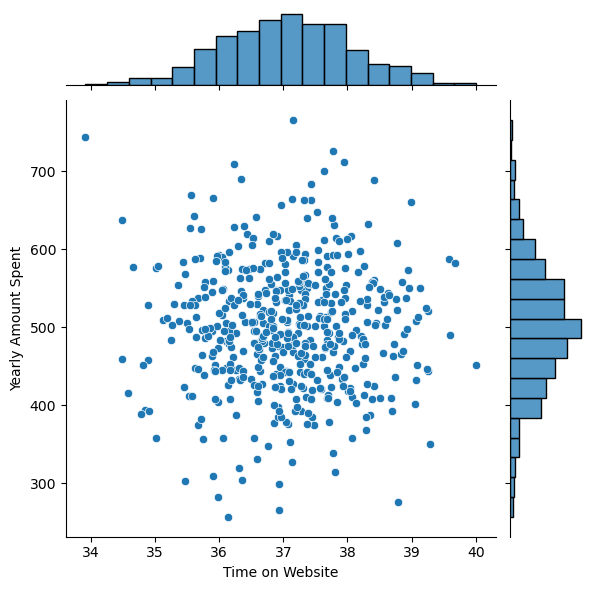

In [10]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data = data)

There may be somehwat of a coorelation here but it is not immediately obvious. Let's continue to look for potential correlations in the data.

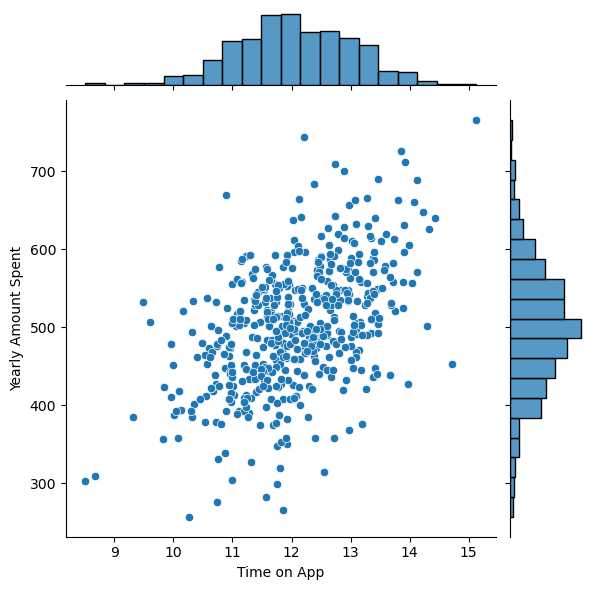

In [11]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=data)

A (linear) correlation here is a bit more visibly obvious. Let's explore this further.

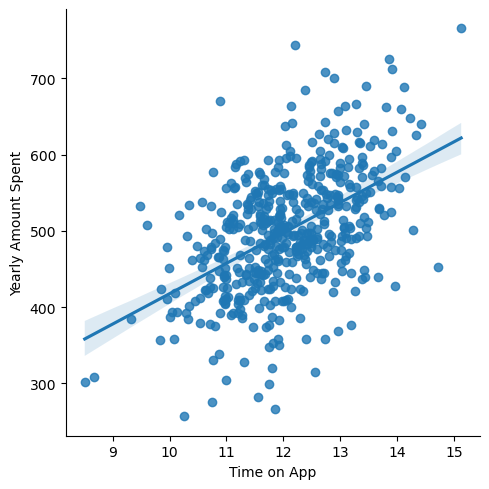

In [12]:
sns.lmplot(x='Time on App', y='Yearly Amount Spent', data = data)

Interesting. Here we can effectively deduce, or predict, an estimated 'Yearly Amount Spent' based on a given x value ('Time on App'). For instance, if a user were to spend 12 hours on the app, they are quite likely to spend approximately $500 per year.

It is important to note that here we have a clear correlation between the timer users spend on the app and how much they spend annually. Perhaps more importantly, it is necessary to mention that there is no existing similar correlation for the website. This indicates that it may be of our best interests to focus on driving user-engagement on our app. It may also indicate to us that we need to allocate more or possibly less resources to our website. For instance, if we are spending a lot of money on the website currently, it may benefit us financially to pivot and re-allocate those resources into the app to help strengthen the linear trend of sales that is quite evident already.

These are all considerations and decisions that management can deliberate at a later time when reflecting upon the data, of course.

Let's look for other correlations by using what's known as a heatmap

<AxesSubplot: >

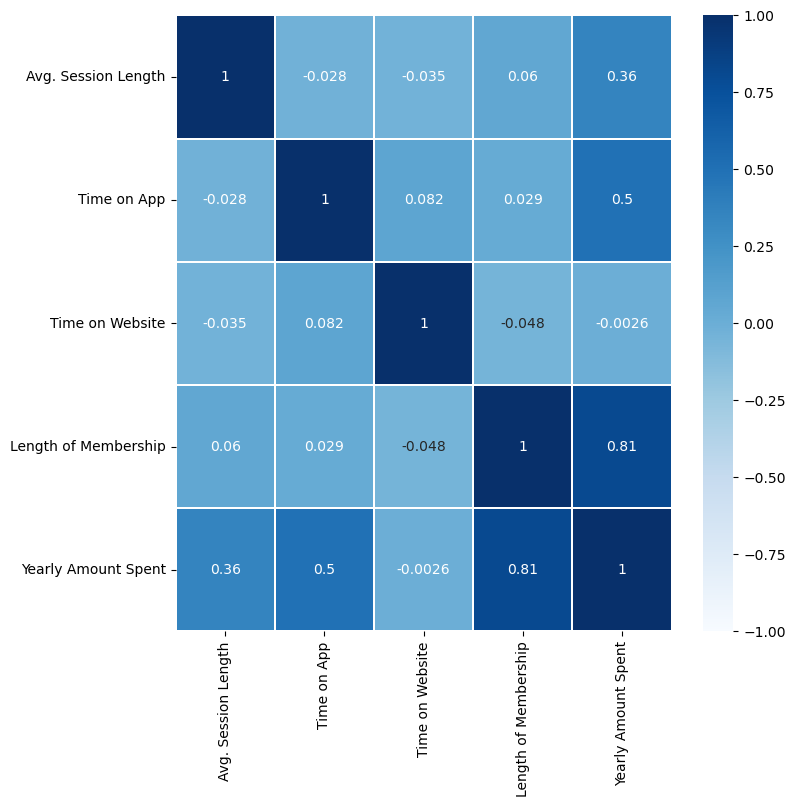

In [13]:
correlation = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, vmin=-1, cmap="Blues",
            annot=True, linewidth=0.1)

According to this heatmap, the column with the strongest correlation to 'Yearly Amount Spent' is 'Length of Membership' (81% correlation). For now this is what we're going to focus on in an effort to enhance our sales results.

Here is another way to visualize various relationships between datapoints

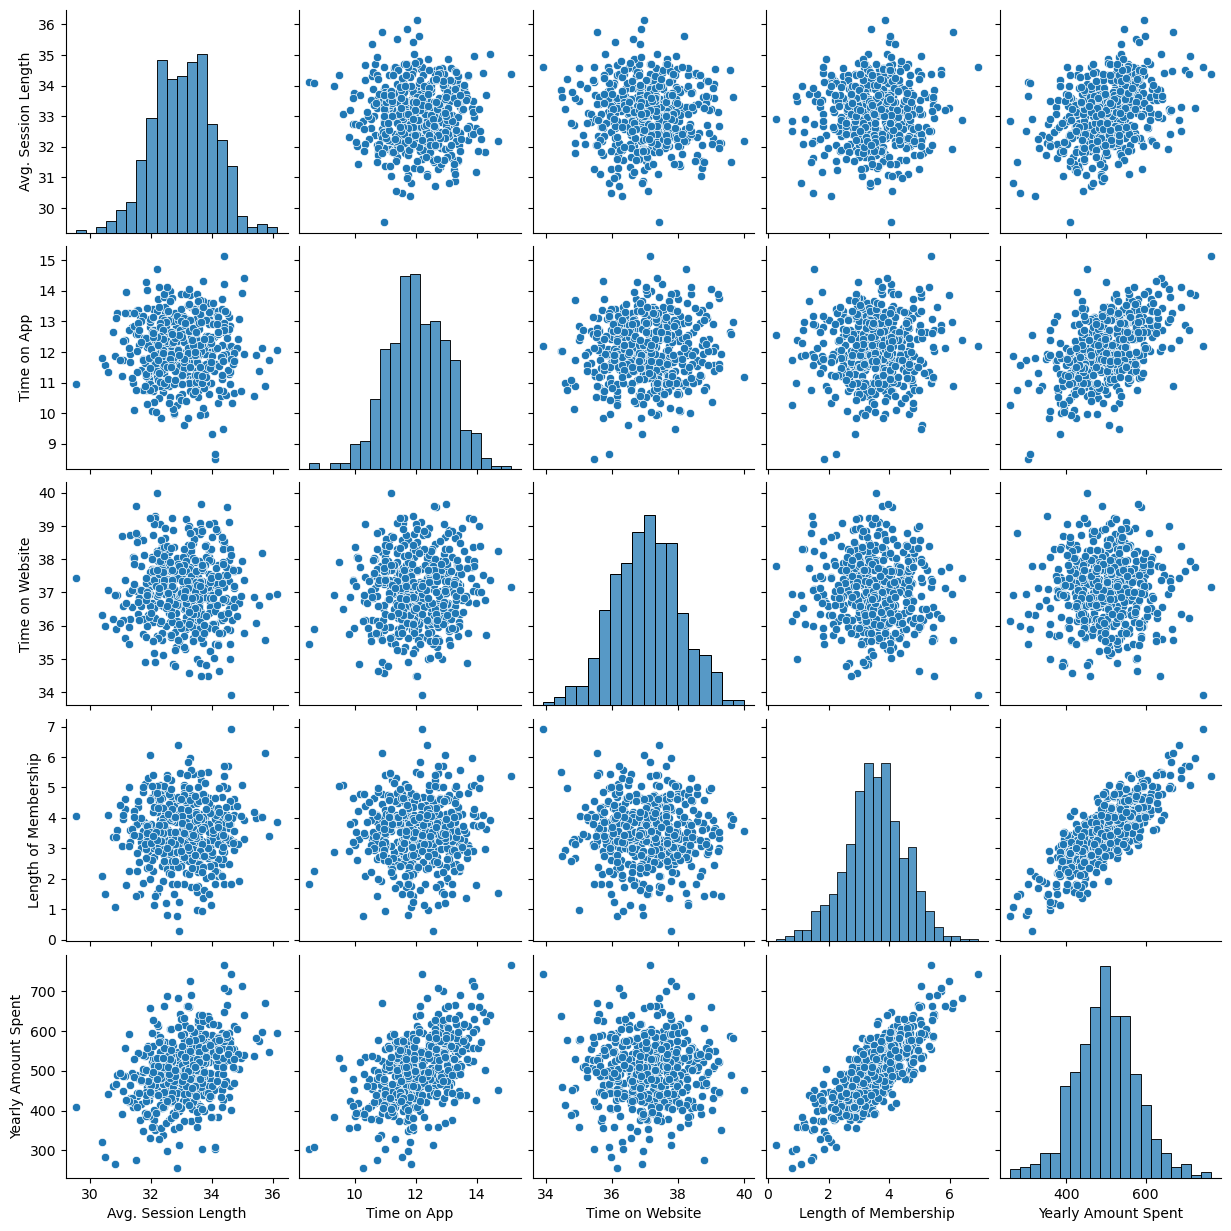

In [14]:
sns.pairplot(data)

# User-Interface feature (1) --> Dropdown menu

Below I have picked out the columns with the strongest correlations to 'Yearly Amount Spent'. To interact with the scatter plot, use the dropdown menu to change the (column) value of the x-axis. 

In [53]:
def scatter_plot(x = 'Length of Membership',y = 'Yearly Amount Spent'):
    plt.figure(dpi = 60)
    sns.set_style('darkgrid')
    return sns.scatterplot(data = data, x = x,y = y, alpha = 0.8);

In [54]:
_ = interact(scatter_plot,
             x = widgets.Dropdown(
                 options = ['Avg. Session Length','Time on App','Time on Website','Length of Membership']
                 ),
             y = widgets.Dropdown(
                 options = ['Yearly Amount Spent']
                 )
            );

interactive(children=(Dropdown(description='x', options=('Avg. Session Length', 'Time on App', 'Time on Websit…

* As you can see, there is a clear linear trend (correlation) between 'Length of Membership' and 'Yearly Amount Spent'. 
* So, the strongest correlation in our data exists between 'Length of Membership' and 'Yearly Amount Spent'. 
* This is quite insightful. In business terms, this can potentially be translated as: if we can sustain an increase in 'Length of Membership', we can expect an increase in 'Yearly Amount Spent' on a customer by customer basis.

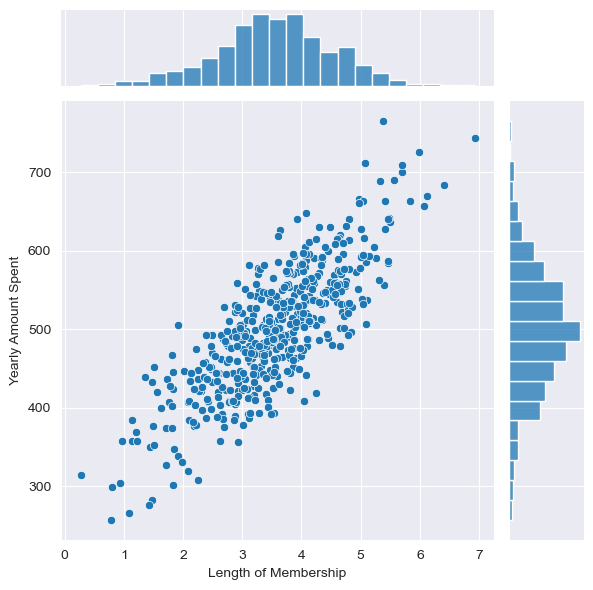

In [55]:
sns.jointplot(x='Length of Membership', y='Yearly Amount Spent', data=data)

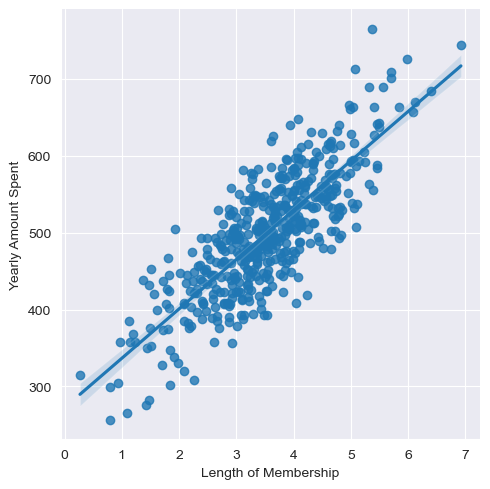

In [56]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data = data)

Now we can build a linear regression model based on this discovery

This model should give us the ability to predict 'Yearly Amount Spent'

In [57]:
x = data[['Length of Membership', 'Time on App', 'Time on Website', 'Avg. Session Length']]
y = data['Yearly Amount Spent']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [59]:
print("Training data shape: ", x_train.shape)

Training data shape:  (350, 4)


In [60]:
print("Testing data shape: ", x_test.shape)

Testing data shape:  (150, 4)


Building the Machine Learning model:

In [61]:
x_train = sm.add_constant(x_train)
results = sm.OLS(y_train, x_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     5825.
Date:                 Mon, 07 Nov 2022   Prob (F-statistic):          3.46e-315
Time:                         12:35:31   Log-Likelihood:                -1296.2
No. Observations:                  350   AIC:                             2602.
Df Residuals:                      345   BIC:                             2622.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1050.6537     26.458    -39.710      0.000   -1102.694    -998.614
Length of Membership    61.6747      0.516    119.540      0.000      60.660      62.690
Time on App             38.5971      0.528     73.045      0.000      37.558      39.636
Time on Website          0.4591      0.520      0.884      0.377      -0.563       1.481
Avg. Session Length     25.7243      0.534     48.137      0.000      24.673      26.775
==============================================================================
Omnibus:                        1.523   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.467   Jarque-Bera (JB):                1.262
Skew:                          -0.108   Prob(JB):                        0.532
Kurtosis:                       3.199   Cond. No.                     2.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

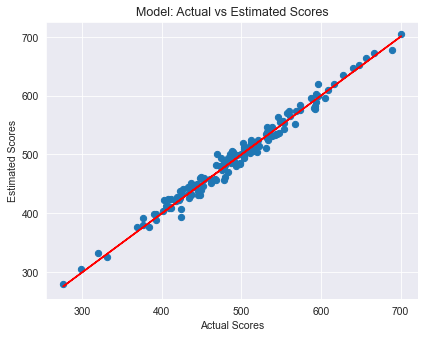

In [62]:
x_test = sm.add_constant(x_test)
y_preds = results.predict(x_test)

plt.figure(dpi = 75)
plt.scatter(y_test, y_preds)
plt.plot(y_test,y_test, color='red')
plt.xlabel('Actual Scores')
plt.ylabel('Estimated Scores')
plt.title('Model: Actual vs Estimated Scores')
plt.show()

In [63]:
from sklearn import metrics
print('Mean Absolute Error :'," ", metrics.mean_absolute_error(y_test,y_preds))
print('Mean Squared Error :'," ", metrics.mean_squared_error(y_test,y_preds))
print('Root Mean Squared Error :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_preds)))

Mean Absolute Error :   8.426091641432295
Mean Squared Error :   103.91554136503642
Root Mean Squared Error :   10.193897260863306


Error evaluation of the model

In [64]:
x = data[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = data['Yearly Amount Spent']

In [65]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [66]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [67]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.72425621 38.59713548  0.45914788 61.67473243]


In [68]:
predictions = lm.predict(x_test)

In [69]:
coeffecients = pd.DataFrame(lm.coef_,x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.72426
Time on App,38.59714
Time on Website,0.45915
Length of Membership,61.67473


* Let's break these coeffecients down in business terms. Let's look at 'Length of Membership'. The coeffecient is 61.67. 
* This means that, for every additional unit increase in 'Length of Membership', we can reasonably expect an estimated increase of $61.67 for 'Yearly Amount Spent' for that corresponding account. 

* This basically means that, on average, each additional year of membership length equates to an additional $61.67 in customer spending.

<AxesSubplot: ylabel='Density'>

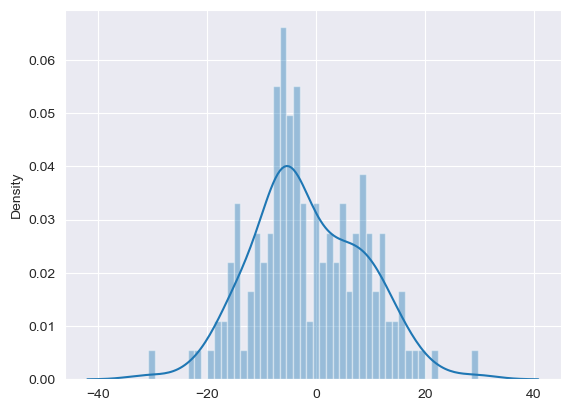

In [70]:
sns.distplot(y_test - y_preds, bins=50)

<AxesSubplot: xlabel='Time on App', ylabel='Yearly Amount Spent'>

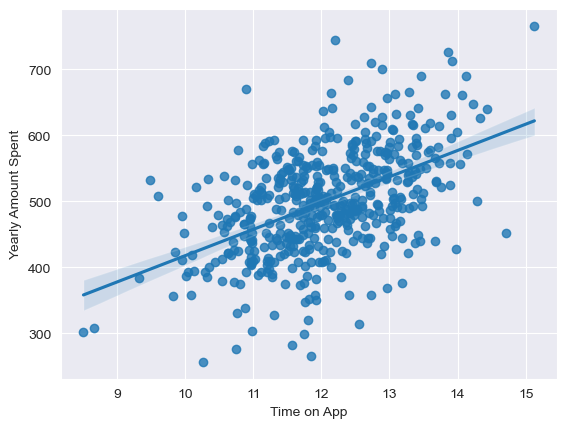

In [71]:
sns.regplot(data=data, x= 'Time on App', y= 'Yearly Amount Spent')

<AxesSubplot: xlabel='Time on Website', ylabel='Yearly Amount Spent'>

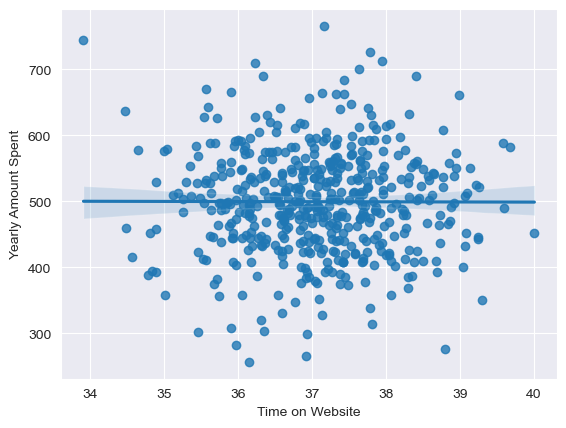

In [72]:
sns.regplot(data=data, x= 'Time on Website', y='Yearly Amount Spent')

As you can see here, increasing a user's time spent on the website does not quite correlate to the user (annual) spending amount.

This can be interpreted in a number of ways from the perspective of Business Intelligence:
* It could imply that the website needs some work 
* It could also imply that the website does not warrant the deployment of business resources at this time, and that continuing to increase a user's time spent on the App is more important and ultimately more valuable to the business

<AxesSubplot: xlabel='Yearly Amount Spent', ylabel='Count'>

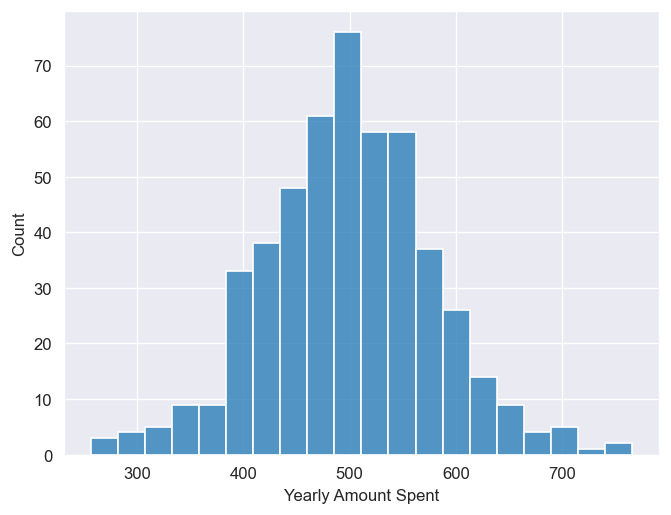

In [73]:
plt.figure(dpi = 120)
sns.histplot(data = data, x = 'Yearly Amount Spent',palette='BuPu')

In [74]:
def plot_histogram(bins = 20, kde = False, palette = 'mako', x_range_1 = (1,1000)): 

    plt.figure(dpi = 90)
    sns.histplot(data = data, 
                        x = 'Yearly Amount Spent',
                        palette=palette, 
                        bins = bins, 
                        kde = kde,
                 
                        
                       )
    plt.xlim(x_range_1)

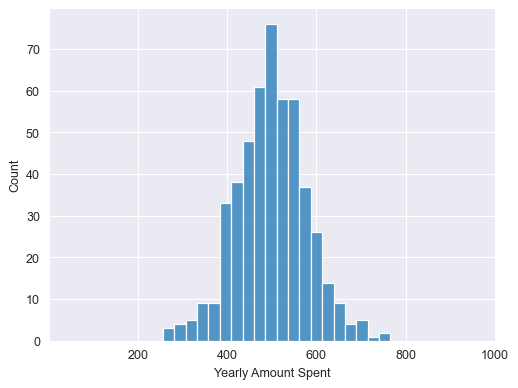

In [75]:
plot_histogram()

# User-Interface feature (2) --> Interactive analysis via dynamic histograms

In [76]:
# This interactive graph allows users to visualize the distribution of 'Yearly Amount Spent' from various perspectives

In [77]:
_ = interact(plot_histogram,
         bins = widgets.IntSlider(
             value = 10,
             min = 1,
             max = 1000,
             step = 10
         )
        )

interactive(children=(IntSlider(value=10, description='bins', max=1000, min=1, step=10), Checkbox(value=False,…

In [78]:
spentMean = data['Yearly Amount Spent'].mean()
print(f"Yearly Amount Spent (mean): ${'{:,.2f}'.format(spentMean)}")

Yearly Amount Spent (mean): $499.31


In [79]:
def plot_histogram2(bins = 20, kde = False, palette = 'mako', x_range_1 = (1,70)): 

    plt.figure(dpi = 55)
    sns.histplot(data = data, 
                        x = 'Time on Website',
                        palette=palette, 
                        bins = bins, 
                        kde = kde,
                 
                        
                       )
    plt.xlim(x_range_1)

In [80]:
# Here is an interactive look at 'Time on Website'

In [81]:
_ = interact(plot_histogram2,
         bins = widgets.IntSlider(
             value = 10,
             min = 1,
             max = 300,
             step = 5
         )
        )

interactive(children=(IntSlider(value=10, description='bins', max=300, min=1, step=5), Checkbox(value=False, d…

In [82]:
websiteTimeMean= data['Time on Website'].mean()
print(f"Mean time on website: {'{:,.2f}'.format(websiteTimeMean)}")

Mean time on website: 37.06


In [83]:
def plot_histogram3(bins = 15, kde = False, palette = 'mako', x_range_1 = (-1,8)): 

    plt.figure(dpi = 65)
    sns.histplot(data = data, 
                        x = 'Length of Membership',
                        palette=palette, 
                        bins = bins, 
                        kde = kde,
                 
                        
                       )
    plt.xlim(x_range_1)

In [84]:
_ = interact(plot_histogram3,
         bins = widgets.IntSlider(
             value = 10,
             min = 1,
             max = 300,
             step = 5
         )
        )

interactive(children=(IntSlider(value=10, description='bins', max=300, min=1, step=5), Checkbox(value=False, d…

In [85]:
memLengthMean = data['Length of Membership'].mean()
print(f"Mean length of membership: {'{:,.2f}'.format(memLengthMean)}")

Mean length of membership: 3.53


<AxesSubplot: xlabel='Yearly Amount Spent', ylabel='Length of Membership'>

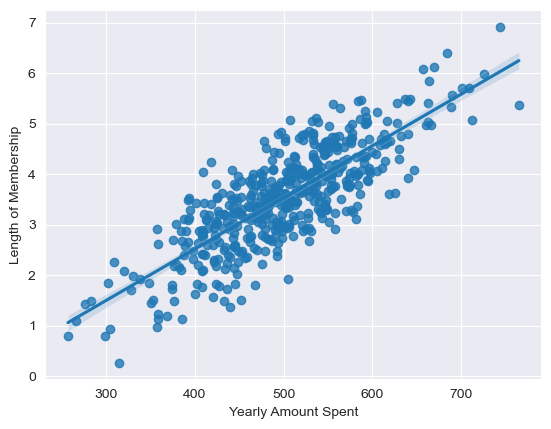

In [86]:
sns.regplot(data=data, x= 'Yearly Amount Spent', y= 'Length of Membership')